In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
import math

# Define a custom colorblind friendly colormap
custom_cmap = [
    '#e69f00',   
    '#0072b2',
    '#56b4e9',
    '#cc79a7', 
    '#f0e442', 
    '#009e73', 
    '#000000'
]
plt.rcParams["axes.prop_cycle"] = cycler(color=custom_cmap)
plt.rcParams['axes.axisbelow'] = True

# Seed random generator for reproducibility
rng = np.random.default_rng(42)

# Set n samples we want
n_samples = 256

# Generate data
weights_m = rng.normal(80, 10, n_samples//2)
weights_f = rng.normal(65, 10, n_samples//2)

heights_m = weights_m + rng.normal(100, 20, n_samples//2)
heights_f = weights_f + rng.normal(90, 10, n_samples//2)

#is_male = np.ones(n_samples, dtype=np.int8)
#is_male[n_samples//2:]-=1

# Create dataframe from data
df_w2h = pd.DataFrame({"height": np.concatenate([heights_m, heights_f]), 
                       "weight": np.concatenate([weights_m, weights_f])})
df_w2h = df_w2h[~df_w2h['weight'].between(75, 80, inclusive='left')]
new_row = pd.DataFrame({'height': [130, 220], 'weight': [75.1, 79.9]})
df_w2h = pd.concat([df_w2h, new_row], ignore_index=True)
print(df_w2h.head())

       height     weight
0  191.742492  83.047171
1  162.077038  69.600159
2  184.828053  87.504512
3  161.907731  89.405647
4  155.726173  60.489648


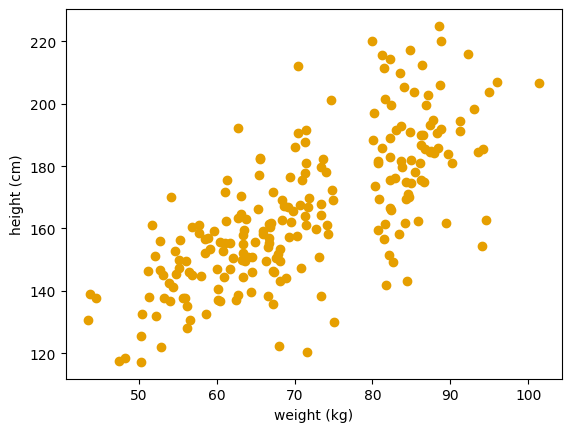

In [2]:
plt.figure()
plt.scatter(df_w2h.weight, df_w2h.height)
plt.xlabel("weight (kg)")
plt.ylabel("height (cm)")
plt.savefig("figs/weight_height_dataset.png")
plt.show()

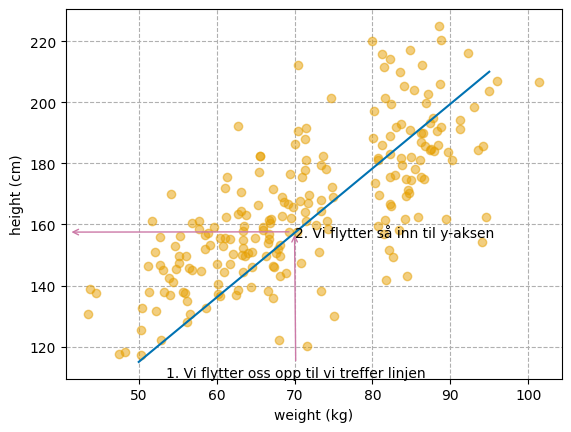

In [3]:
plt.figure()
plt.grid(linestyle='--')
plt.scatter(df_w2h.weight, df_w2h.height, alpha=0.5)
plt.annotate('1. Vi flytter oss opp til vi treffer linjen', xy=(70, 157.5), xytext=(53.5, 110), arrowprops=dict(facecolor='yellow',ec = custom_cmap[3], arrowstyle='->'))
plt.annotate('2. Vi flytter så inn til y-aksen', xy=(41, 157.5), xytext=(70, 156), arrowprops=dict(facecolor='yellow',ec = custom_cmap[3], arrowstyle='->'))
#plt.vlines(70, ymin=110, ymax=157.5, color=custom_cmap[5])
#plt.hlines(157.5, xmin=45, xmax=70, color=custom_cmap[5])
plt.plot([50, 95], [115, 210], color=custom_cmap[1])
plt.xlabel("weight (kg)")
plt.ylabel("height (cm)")
plt.savefig("figs/finding_y.png")
plt.show()

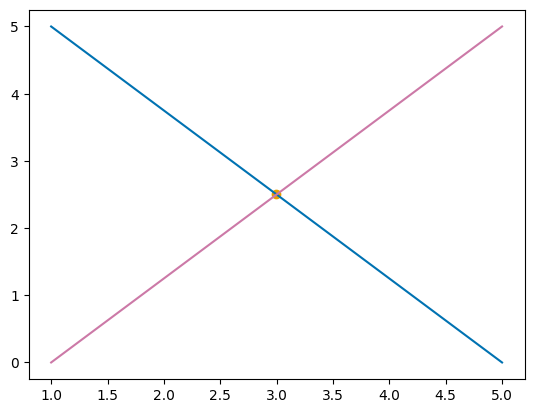

In [4]:
plt.plot([1, 5], [5, 0], color=custom_cmap[1])
plt.plot([1, 5], [0, 5], color=custom_cmap[3])
plt.scatter(2.991, 2.5)

plt.savefig("figs/two_lines.png")
plt.show()

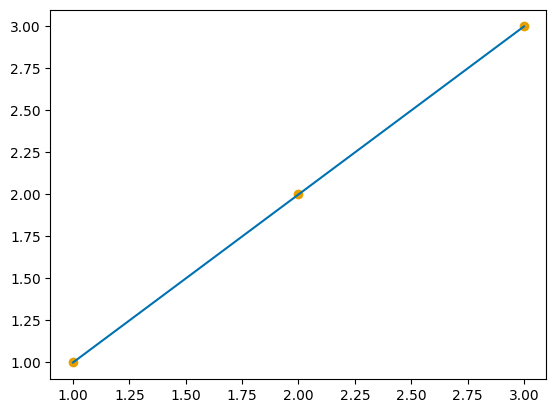

In [5]:
plt.plot([1, 2, 3], [1, 2, 3], color=custom_cmap[1])
plt.scatter([1,2,3],[1,2,3])
plt.savefig("figs/three_linear_points.png")
plt.show()

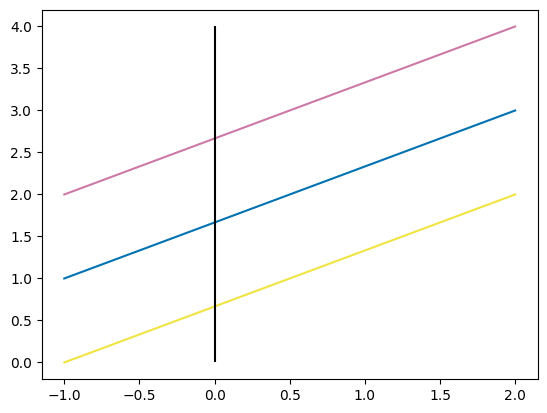

In [6]:
plt.plot([-1, 2], [1, 3], color=custom_cmap[1])
plt.plot([-1, 2], [2, 4], color=custom_cmap[3])
plt.plot([-1, 2], [0, 2], color=custom_cmap[4])
plt.vlines(0, ymin=0, ymax=4, color='black')
plt.savefig("figs/three_lines_same_a.png")
plt.show()

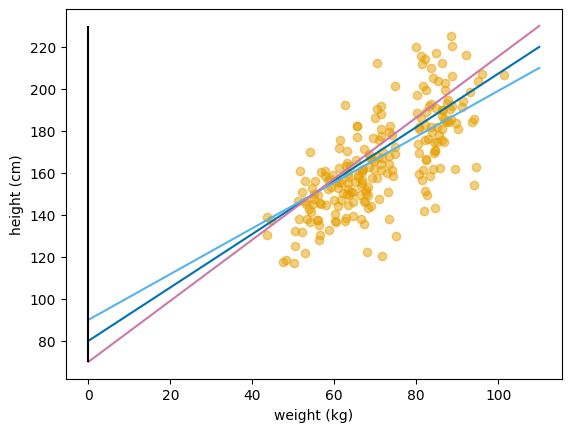

In [7]:
plt.figure()
plt.scatter(df_w2h.weight, df_w2h.height, alpha=0.5)
plt.plot([0, 110], [80, 220], color=custom_cmap[1])
plt.plot([0, 110], [90, 210], color=custom_cmap[2])
plt.plot([0, 110], [70, 230], color=custom_cmap[3])
plt.vlines(0, ymin=70, ymax=230, color='black')
plt.xlabel("weight (kg)")
plt.ylabel("height (cm)")
plt.savefig("figs/three_lines.png")
plt.show()

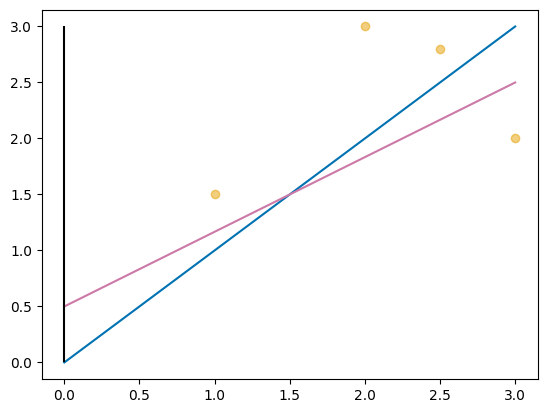

In [84]:
plt.figure()
points_x = [1, 2, 2.5, 3]
points_y = [1.5, 3, 2.8, 2]
plt.scatter(points_x, points_y, color=custom_cmap[0], alpha=0.5)
plt.plot([0, 3], [0, 3], color=custom_cmap[1])
plt.plot([0, 3], [0.5, 2.5], color=custom_cmap[3])


plt.vlines(0, ymin=0, ymax=3, color='black')
plt.savefig("figs/best_fitting_line_1.png")
plt.show()

In [86]:
def residual_between_point_and_line(point_x, point_y, line_a, line_b):
    # Find the value of our line at the x-value of our point
    line_y = line_a*point_x + line_b
    # Subtract our line value from the y-value of our point
    return line_y - point_y

In [59]:
distances_line_1 = [] 
distances_line_2 = [] 
for i,_ in enumerate(points_x):
    distances_line_1.append(residual_between_point_and_line(points_x[i], points_y[i], 1, 0))
    distances_line_2.append(residual_between_point_and_line(points_x[i], points_y[i], 0.666666, 0.5))
    

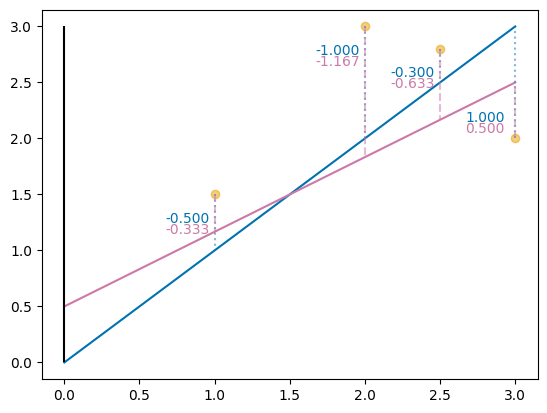

In [95]:
plt.figure()
plt.scatter(points_x, points_y, color=custom_cmap[0], alpha=0.5)
plt.plot([0, 3], [0, 3], color=custom_cmap[1])
plt.plot([0, 3], [0.5, 2.5], color=custom_cmap[3])
for i, _ in enumerate(distances_line_1):
    plt.vlines(points_x[i], points_y[i], points_y[i]+distances_line_1[i], color=custom_cmap[1], linestyle='dotted', alpha=0.5)
    plt.vlines(points_x[i], points_y[i], points_y[i]+distances_line_2[i], color=custom_cmap[3], linestyle='--', alpha=0.5)
    if i == 3:
        plt.annotate(f'{distances_line_1[i]:.3f}', xy=(points_x[i]-0.33, points_y[i]+0.15), color=custom_cmap[1])
        plt.annotate(f'{distances_line_2[i]:.3f}', xy=(points_x[i]-0.33, points_y[i]+0.05), color=custom_cmap[3])
    else:
        plt.annotate(f'{distances_line_1[i]:.3f}', xy=(points_x[i]-0.33, points_y[i]-0.25), color=custom_cmap[1])
        plt.annotate(f'{distances_line_2[i]:.3f}', xy=(points_x[i]-0.33, points_y[i]-0.35), color=custom_cmap[3])

plt.vlines(0, ymin=0, ymax=3, color='black')
plt.savefig("figs/best_fitting_line_2.png")
plt.show()

In [80]:
print(f'Blå linje: {distances_line_1}')
print(f'Lilla linje: {distances_line_2}')

Blå linje: [-0.5, -1, -0.2999999999999998, 1]
Lilla linje: [-0.333334, -1.166668, -0.6333349999999998, 0.4999979999999997]


In [83]:
print(f'Blå linje: {sum(distances_line_1):.3f}')
print(f'Lilla linje: {sum(distances_line_2):.3f}')

Blå linje: -0.800
Lilla linje: -1.633


In [82]:
print(f'Blå linje^2: {sum(np.asarray(distances_line_1)**2):.3f}')
print(f'Lilla linje^2: {sum(np.asarray(distances_line_2)**2):.3f}')

Blå linje^2: 2.340
Lilla linje^2: 2.123


In [96]:
import statsmodels.api as sm

X = sm.add_constant(points_x)
y = points_y
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                 -0.246
Method:                 Least Squares   F-statistic:                    0.4080
Date:                Mon, 12 Jan 2026   Prob (F-statistic):              0.588
Time:                        07:59:11   Log-Likelihood:                -3.2990
No. Observations:                   4   AIC:                             10.60
Df Residuals:                       2   BIC:                             9.371
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6086      1.188      1.354      0.3

/home/hakon/development/enklypesalt_code/.devenv/state/venv/lib/python3.12/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [97]:
X_carousel = sm.add_constant(df_w2h.weight)
y_carousel = df_w2h.height
model = sm.OLS(y_carousel, X_carousel).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     242.2
Date:                Mon, 12 Jan 2026   Prob (F-statistic):           2.81e-37
Time:                        08:08:04   Log-Likelihood:                -925.76
No. Observations:                 221   AIC:                             1856.
Df Residuals:                     219   BIC:                             1862.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.9374      6.120     11.755      0.0

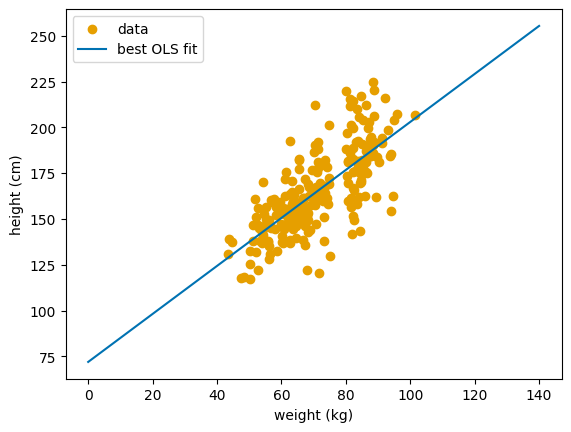

In [103]:
plt.figure()
plt.scatter(df_w2h.weight, df_w2h.height, label='data')
plt.xlabel("weight (kg)")
plt.ylabel("height (cm)")
plt.plot([0, 140], [71.94+1.31*0, 71.94+1.31*140], color=custom_cmap[1], label='best OLS fit')
plt.legend()
plt.savefig("figs/best_line_carousel.png")
plt.show()

In [105]:
test_data = pd.DataFrame(df_w2h.sample(int(len(df_w2h)*0.1), random_state = rng))# Sample verification data
train_data = df_w2h.drop(test_data.index) # Remove the sample from the data used to generate predictions

X_carousel_train = sm.add_constant(train_data.weight)
y_carousel_train = train_data.height
model = sm.OLS(y_carousel_train, X_carousel_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     198.5
Date:                Mon, 12 Jan 2026   Prob (F-statistic):           1.22e-31
Time:                        08:36:58   Log-Likelihood:                -840.29
No. Observations:                 199   AIC:                             1685.
Df Residuals:                     197   BIC:                             1691.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         73.7134      6.649     11.087      0.0

In [109]:
# Calculate root squared average distance
def rms_diff(predictions, test_data):
    differences = []
    for idx, vp in enumerate(test_data.iterrows()):
        differences.append((predictions[idx]-vp[1].height)**2)
    
    return math.sqrt(sum(differences)/len(differences))

In [110]:
test_predictions = [73.71+1.30*wt[1].weight for wt in test_data.iterrows()]
# Calculate root squared average distance
print(rms_diff(test_predictions, test_data))

9.922001376868534
